
########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /Users/williamblair/project2/data/input/E03/ADC_deformed.nii.gz
preprocessing...
image shape after preprocessing:  (121, 145, 121)
prediction (CNN id)...
0
running postprocessing... 
exporting segmentation...
File: /Users/williamblair/project2/data/input/E03/FA_deformed.nii.gz
preprocessing...
image shape after preprocessing:  (121, 145, 121)
prediction (CNN id)...
0
running postprocessing... 
exporting segmentation...
File: /Users/williamblair/project2/data/input/E03/T1w_1mm.nii.gz
preprocessing...
image shape after preprocessing:  (121, 145, 121)
prediction (CNN id)...
0
running postprocessing... 
e

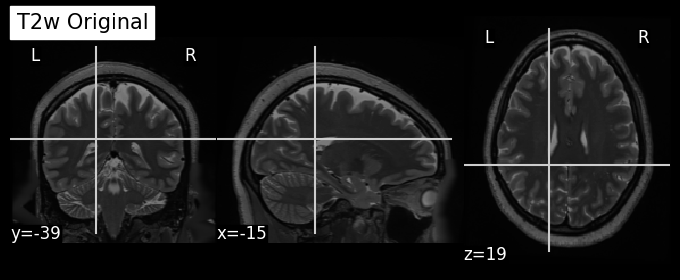

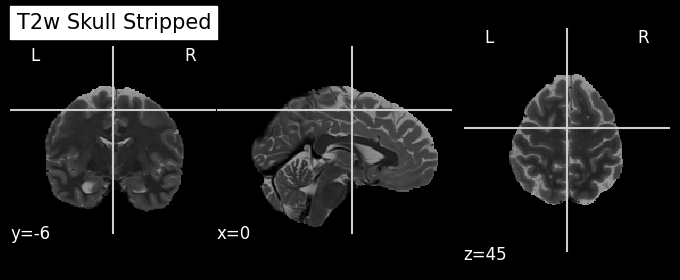

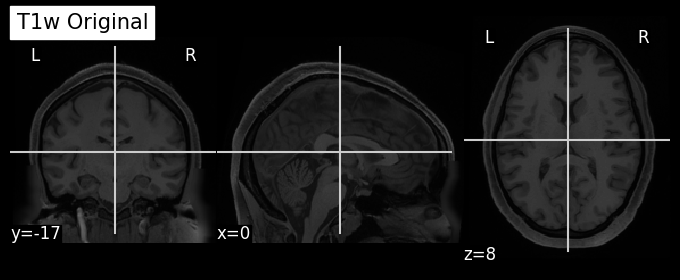

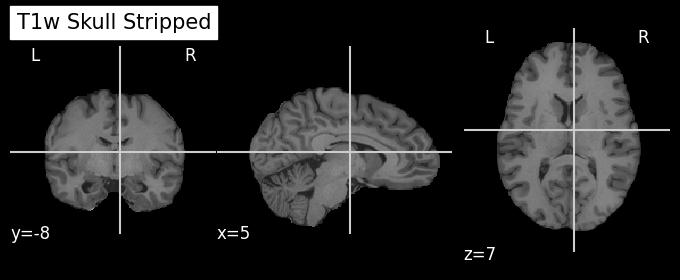

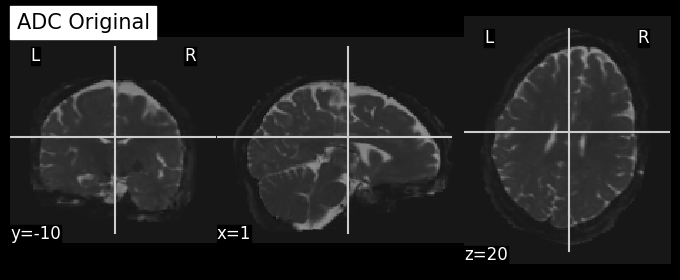

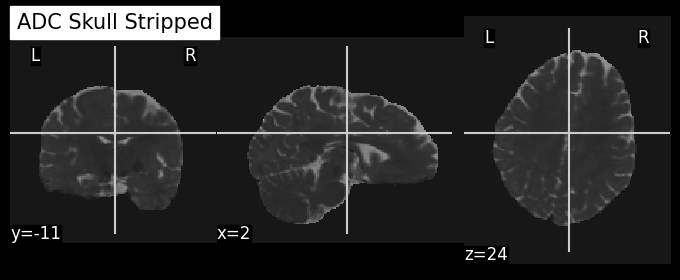

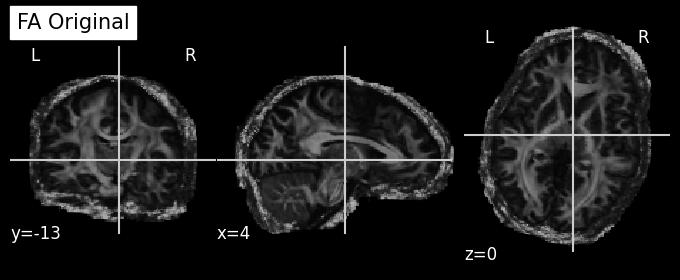

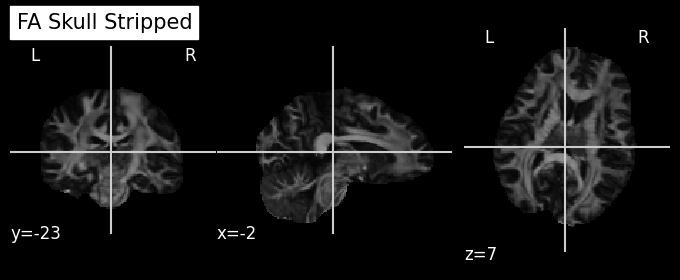

In [1]:
import os
import subprocess
import os
import shlex
import subprocess
import multiprocessing as mp
from nilearn import plotting
import matplotlib
import matplotlib.pyplot as plt
import nibabel as nib

root_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

def main():
    # Change the working directory to the "data" folder
    os.chdir('../data/input')

    # Get the list of patient folders
    patient_folders = [folder for folder in os.listdir() if os.path.isdir(folder) and folder.startswith('E')]

    # Run BET on each patient folder for each input image and save the output with the same name
    for patient_folder in patient_folders:
        input_folder = os.path.abspath(patient_folder)
        output_folder = os.path.abspath(os.path.join(patient_folder))

        # Update the command with the full path to the HD-BET package
        command = f'/Users/williamblair/williamblair/miniconda/bin/hd-bet -i "{input_folder}" -o "{output_folder}" -device cpu -mode fast -tta 0'
        subprocess.run(command, shell=True)

if __name__ == "__main__":
    main()

def display_image(input_image_file, output_image_file, title):
    """
    Display NIfTI image using nilearn.
    
    Args:
        input_image_file (str): Path to the original NIfTI file.
        output_image_file (str): Path to the skull-stripped NIfTI file.
        title (str): Title of the plot.
    """
    plotting.plot_anat(input_image_file, title=title + " Original", display_mode='ortho')
    plotting.plot_anat(output_image_file, title=title + " Skull Stripped", display_mode='ortho')
    plotting.show()

display_image(os.path.join(root_dir, 'data', 'input', 'E03', "T2w_1mm_noalign.nii.gz"),
              os.path.join(root_dir, 'data', 'input', 'E03', 'output', "T2w_1mm_noalign.nii.gz"),
              "T2w")

display_image(os.path.join(root_dir, 'data', 'input', 'E03', "T1w_1mm.nii.gz"),
              os.path.join(root_dir, 'data', 'input', 'E03', 'output', "T1w_1mm.nii.gz"),
              "T1w")

display_image(os.path.join(root_dir, 'data', 'input', 'E03', "ADC_deformed.nii.gz"),
              os.path.join(root_dir, 'data', 'input', 'E03', 'output', "ADC_deformed.nii.gz"),
              "ADC")

display_image(os.path.join(root_dir, 'data', 'input', 'E03', "FA_deformed.nii.gz"),
              os.path.join(root_dir, 'data', 'input', 'E03', 'output', "FA_deformed.nii.gz"),
              "FA")


#change back to code directory
os.chdir('..')
os.chdir('..')
os.chdir('code')